# Figure 1: Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Set plotting style

In [2]:
sns.set_style('ticks')
plt.style.use('custom.mplstyle')

## Load data

In [3]:
metadata_file = path.join('../..', 'data', 'processed','modulome', 'metadata_sorted.tsv')
logTPM_file = path.join('../..', 'data', 'processed','modulome','log_tpm.csv')
DF_metadata = pd.read_csv(metadata_file, sep='\t', index_col=0)
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0)

In [4]:
FIGURE_DIR='../../reports/figures/modulome/Fig1/'

## Supplementary: Quality control pie chart

In [5]:
metadata_qc = path.join('../..', 'data','interim','modulome','metadata_qc_part2_all.tsv')
DF_metadata_qc = pd.read_csv(metadata_qc, sep='\t', index_col=0)

In [6]:
# Step 1: Check FastQC
failed_step1 = DF_metadata_qc[~DF_metadata_qc.passed_fastqc].index
df_passed_step1 = DF_metadata_qc[DF_metadata_qc.passed_fastqc]

# Step 2: Check number of reads mapped to CDS
failed_step2 = df_passed_step1[~df_passed_step1.passed_reads_mapped_to_CDS].index
df_passed_step2 = df_passed_step1[df_passed_step1.passed_reads_mapped_to_CDS]

# Step 3: Check global correlations
failed_step3 = df_passed_step2[~df_passed_step2.passed_global_correlation].index
df_passed_step3 = df_passed_step2[df_passed_step2.passed_global_correlation]

# Step 4: Check curation
failed_step4 = df_passed_step3[~df_passed_step3.passed_curation].index
df_passed_step4 = df_passed_step3[df_passed_step3.passed_curation]

# Step 5: Check replicate correlations
failed_step5 = df_passed_step4[~df_passed_step4.passed_replicate_correlations].index
df_passed_step5 = df_passed_step4[df_passed_step4.passed_replicate_correlations]

# Check contamination
failed_contamination = df_passed_step5[~df_passed_step5.passed_contamination_check].index
df_passed_contamination = df_passed_step5[df_passed_step5.passed_contamination_check]

In [7]:
print('Total failed:',len(failed_step1) + len(failed_step2) + len(failed_step3) + len(failed_step4) + len(failed_step5))
print('Total passed:',len(DF_metadata))

Total failed: 78
Total passed: 218


In [8]:
values = [len(failed_step1),
          len(failed_step2),
          len(failed_step3),
          len(failed_step4),
          len(failed_step5),
          len(DF_metadata)]
labels = ['Failed FastQC','Too few reads mapped to CDS','Poor correlation with other datasets','Problems with metadata','Poor correlation between replicates','Passed']

In [9]:
len(DF_metadata_qc)

296

In [10]:
len(DF_metadata_qc) - np.cumsum(values)

array([296, 258, 241, 226, 218,   0])

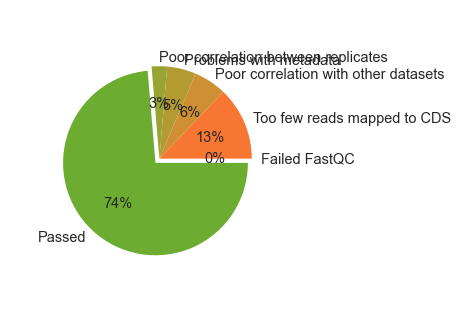

In [36]:
plt.pie(values,labels=labels,autopct = '%.0f%%',textprops={'fontsize':7},radius=0.8,wedgeprops={'linewidth':0},explode=[0,0,0,0,0,0.05]);
plt.savefig(path.join(FIGURE_DIR,'QC_pie.pdf'))

## Panel 1A: Plot growth of dataset

In [37]:
DF_metadata_all = pd.read_csv('../../data/raw/modulome/metadata_everything.csv')
DF_metadata = pd.read_csv('../../data/processed/modulome/metadata_sorted.tsv',sep='\t',index_col=0)

In [38]:
#Filter the 'in-house' samples into a new df
DF_metadata_inhouse = DF_metadata_all[DF_metadata_all['Type'] == 'in-house']
DF_metadata_public = DF_metadata_all[DF_metadata_all['Type'] == 'public']

# Filter out samples not present in DF_metadata
DF_metadata_inhouse = DF_metadata_inhouse[DF_metadata_inhouse['sample_id'].isin(DF_metadata.index)]

# combine the two dataframes
DF_metadata_all = pd.concat([DF_metadata_inhouse,DF_metadata_public])

DF_metadata_all

,Experiment,sample_id,strain,project,condition,notes,run,ReleaseDate,Type,sequencing_run,LibraryLayout,Platform,R1,R2,skip,reference_condition
0,L-galactose-1,L-galactose-1,J1074,azenta trial,L-galactose,"Samples were mistakenly labelled ""L-glutamate""...",NaN,20/12/2023,in-house,run_01_02__merged_azenta,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/merged_L-glu...,/home/nilmat/reads/streptsd/ready/merged_L-glu...,False,Monosodium glutamate
1,L-galactose-2,L-galactose-2,J1074,azenta trial,L-galactose,"Samples were mistakenly labelled ""L-glutamate""...",NaN,20/12/2023,in-house,run_01_02__merged_azenta,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/merged_L-glu...,/home/nilmat/reads/streptsd/ready/merged_L-glu...,False,Monosodium glutamate
2,MSG-1A,MSG-1A,J1074,azenta trial,Monosodium glutamate,sample_id: (carbon source)-(biological replica...,NaN,20/12/2023,in-house,run_01_02__merged_azenta,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/merged_MSG-1...,/home/nilmat/reads/streptsd/ready/merged_MSG-1...,False,Monosodium glutamate
3,MSG-1B,MSG-1B,J1074,azenta trial,Monosodium glutamate,sample_id: (carbon source)-(biological replica...,NaN,20/12/2023,in-house,run_01_02__merged_azenta,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/merged_MSG-1...,/home/nilmat/reads/streptsd/ready/merged_MSG-1...,False,Monosodium glutamate
4,MSG-2A,MSG-2A,J1074,azenta trial,Monosodium glutamate,sample_id: (carbon source)-(biological replica...,NaN,20/12/2023,in-house,run_01_02__merged_azenta,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/merged_MSG-2...,/home/nilmat/reads/streptsd/ready/merged_MSG-2...,False,Monosodium glutamate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,SRR25592624,SRR25592624,Del14-4N24,PRJNA1003853,Del14-4N24_70h,NaN,NaN,09/08/2023,public,PRJNA1003853,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/external/del...,/home/nilmat/reads/streptsd/ready/external/del...,False,Del14-4N24_12h
242,SRR25592625,SRR25592625,Del14-4N24,PRJNA1003853,Del14-4N24_70h,NaN,NaN,09/08/2023,public,PRJNA1003853,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/external/del...,/home/nilmat/reads/streptsd/ready/external/del...,False,Del14-4N24_12h
243,SRR25592626,SRR25592626,Del14-4N24,PRJNA1003853,Del14-4N24_12h,NaN,NaN,09/08/2023,public,PRJNA1003853,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/external/del...,/home/nilmat/reads/streptsd/ready/external/del...,False,Del14-4N24_12h
244,SRR25592627,SRR25592627,Del14-4N24,PRJNA1003853,Del14-4N24_12h,NaN,NaN,09/08/2023,public,PRJNA1003853,PAIRED,ILLUMINA,/home/nilmat/reads/streptsd/ready/external/del...,/home/nilmat/reads/streptsd/ready/external/del...,False,Del14-4N24_12h


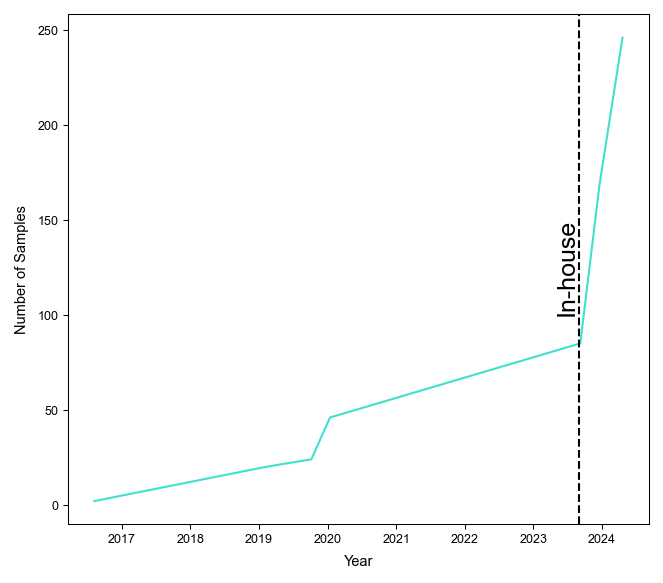

In [40]:
DF_metadata_all['ReleaseDate'] = pd.to_datetime(DF_metadata_all['ReleaseDate'])

first_date = min(DF_metadata_all['ReleaseDate'])
last_date = max(DF_metadata_all['ReleaseDate'])
date_range = pd.date_range(start=first_date,end=last_date,freq='YS')

fig,ax = plt.subplots(figsize=(5,5))
growth = DF_metadata_all['ReleaseDate'].value_counts().sort_index().cumsum()
growth.plot(ax=ax,label='All samples', color='turquoise')
plt.xticks(date_range,date_range.strftime('%Y'),rotation=0,ha='center')
ax.tick_params()
ax.set_xlabel('Year')
ax.set_ylabel('Number of Samples')

# Add a line at 2024-04-01 with a label 'in-house'
plt.axvline(pd.to_datetime('2023-09-01'),linestyle='--',color='black')
plt.text(pd.to_datetime('2023-09-01'),100,'In-house',rotation=90,va='bottom',ha='right')

plt.savefig(path.join(FIGURE_DIR,'Fig1c_data_growth.pdf'))

## Panel 1C: Principal component analysis

First compute principal components.

In [5]:
pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(DF_log_tpm.T),index=DF_log_tpm.columns)
DF_components = pd.DataFrame(pca.components_.T,index=DF_log_tpm.index)

Next, plot the cumulative explained variance

Number of dimensions for 95% of variance: 46


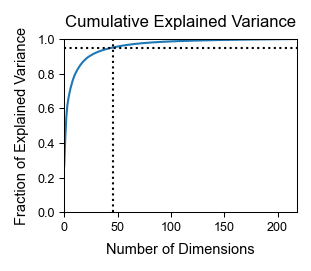

In [6]:
# Set the explained variance threshold
var_cutoff = 0.95

fig,ax = plt.subplots(figsize=(2,1.5))
pca_var = np.cumsum(pca.explained_variance_ratio_)
ax.plot(pca_var)
dims = np.where(pca_var > var_cutoff)[0][0] + 1
ax.vlines(dims,0,1,linestyles='dotted')
ax.hlines(var_cutoff,0,len(DF_log_tpm.columns),linestyles='dotted')
ax.set_ylim(0,1)
ax.set_xlim(0,len(DF_log_tpm.columns))
ax.set_ylabel('Fraction of Explained Variance')
ax.set_xlabel('Number of Dimensions')
ax.set_title('Cumulative Explained Variance')
print('Number of dimensions for 95% of variance:',dims)
# plt.savefig(path.join(FIGURE_DIR,'Fig1_.pdf'))

Finally, plot the first two principle components. The following code colors data by the ``project``. To color by other attributes, change the ``attribute`` variable.

This function requires a few global variables (i.e. ``DF_metadata``, ``DF_weights``, etc.)

In [7]:
sns.set_theme(style='white')
palette = sns.color_palette("hls", 16)

def plot_pca(attribute):
    fig,ax = plt.subplots(figsize=(5,5))
    df_metadata_tmp = DF_metadata.copy()
    df_metadata_tmp.fillna('Not reported',inplace=True)
    for name,group in df_metadata_tmp.groupby(attribute):
        color = palette[df_metadata_tmp[attribute].unique().tolist().index(name)]
        ax.scatter(DF_weights.loc[group.index,0],
                   DF_weights.loc[group.index,1],
                   label=name, color=color, alpha=0.8)

    ax.set_xlabel('Principal Component 1: %.0f%%'%(pca.explained_variance_ratio_[0]*100))
    ax.set_ylabel('Principal Component 2: %.0f%%'%(pca.explained_variance_ratio_[1]*100))

    ax.set_title('Principal Component Plot')
    plt.legend(bbox_to_anchor=(1,1),ncol=2)

    plot_pca('project')
plt.savefig(path.join(FIGURE_DIR,'PCA_project.svg'))

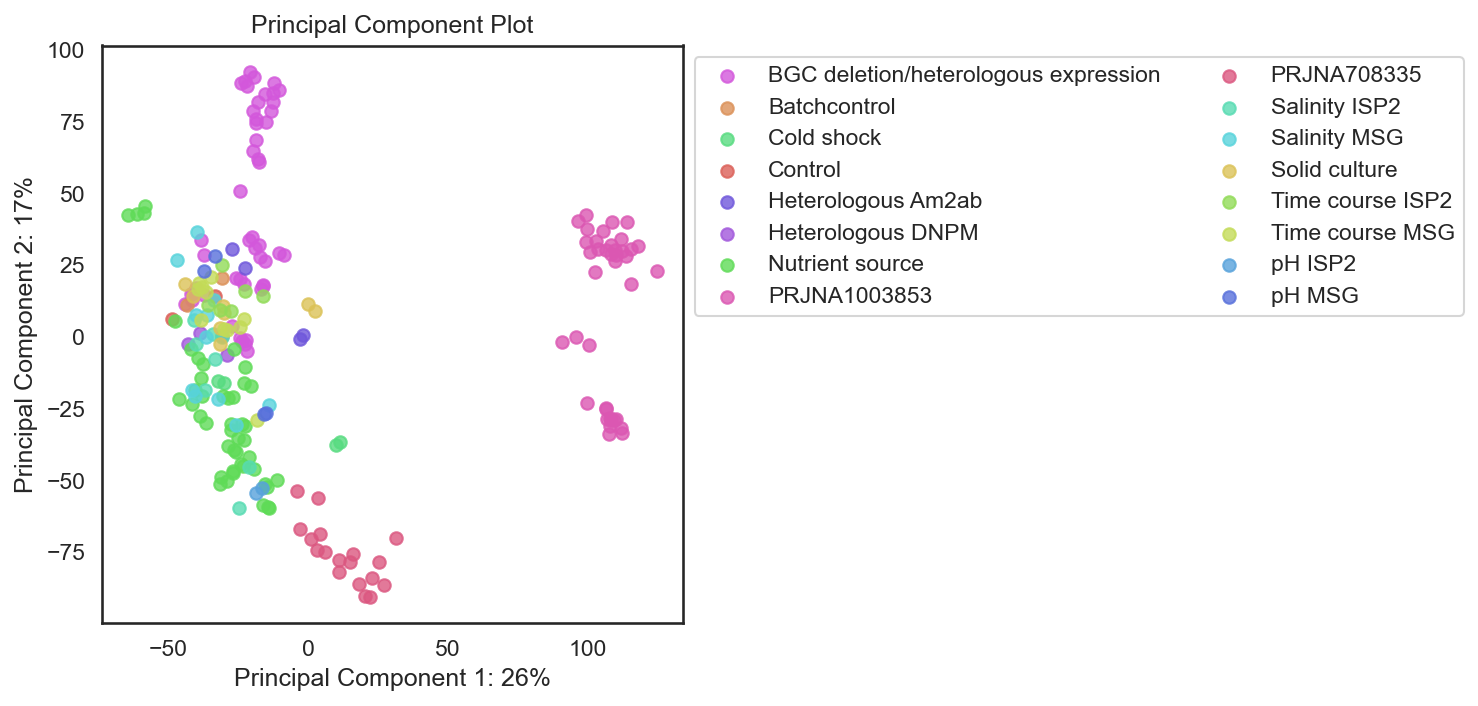

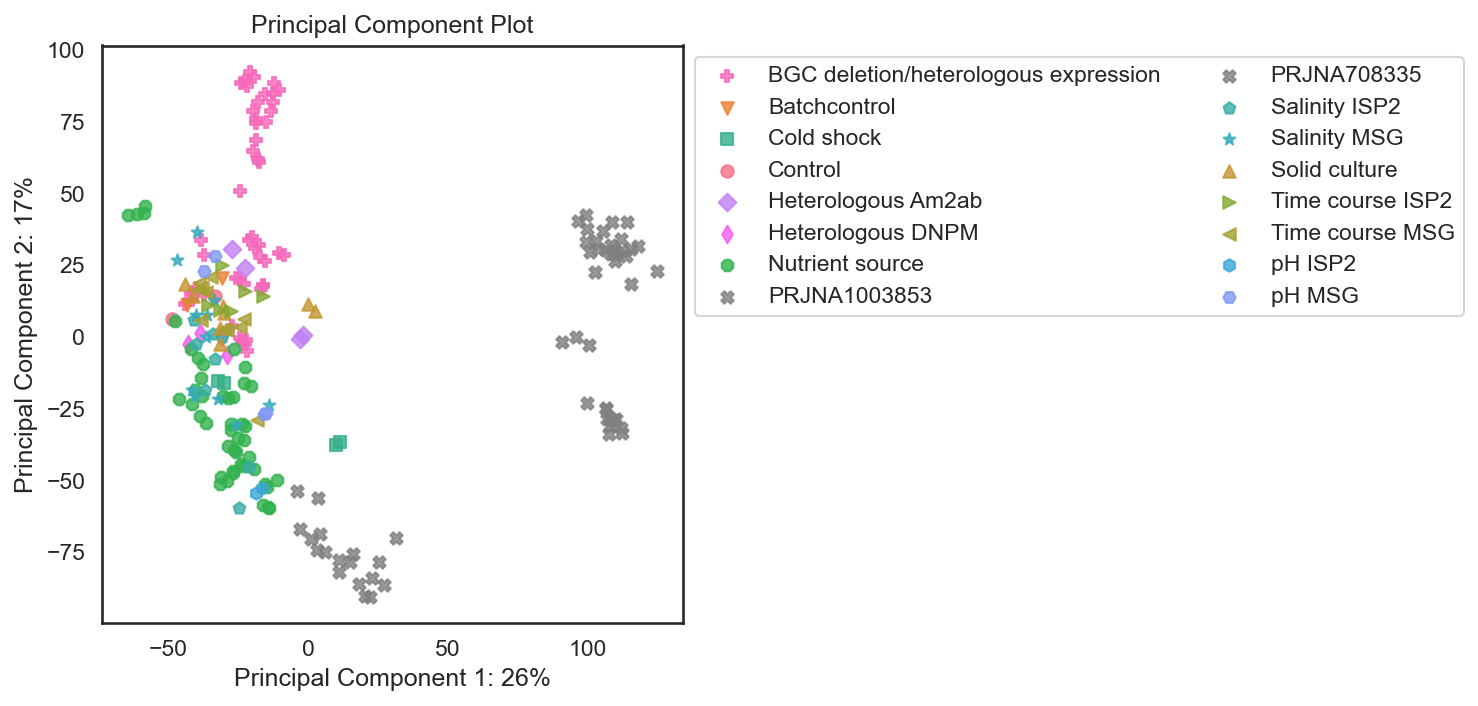

In [14]:
import matplotlib.pyplot as plt

sns.set_theme(style='white')
palette = sns.color_palette("husl", 14)  # Reduced to 14 as two projects will be black
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot_pca(attribute):
    fig,ax = plt.subplots(figsize=(5,5))
    df_metadata_tmp = DF_metadata.copy()
    df_metadata_tmp.fillna('Not reported',inplace=True)
    unique_attributes = [x for x in df_metadata_tmp[attribute].unique().tolist() if x not in ['PRJNA708335', 'PRJNA1003853']]
    for name,group in df_metadata_tmp.groupby(attribute):
        color = 'grey' if name in ['PRJNA708335', 'PRJNA1003853'] else palette[unique_attributes.index(name) if name in unique_attributes else 0]
        marker = markers[df_metadata_tmp[attribute].unique().tolist().index(name) % len(markers)]  # Use modulo to cycle through markers if there are more groups than markers
        if name in ['PRJNA708335', 'PRJNA1003853']:
            marker = 'X'  # Use a different marker for these two projects
        ax.scatter(DF_weights.loc[group.index,0],
                   DF_weights.loc[group.index,1],
                   label=name, color=color, marker=marker, alpha=0.8)

    ax.set_xlabel('Principal Component 1: %.0f%%'%(pca.explained_variance_ratio_[0]*100))
    ax.set_ylabel('Principal Component 2: %.0f%%'%(pca.explained_variance_ratio_[1]*100))

    ax.set_title('Principal Component Plot')
    plt.legend(bbox_to_anchor=(1,1),ncol=2)

plot_pca('project')
plt.savefig(path.join(FIGURE_DIR,'PCA_project.svg'))

In [27]:
# Top left outliers
outliers = DF_weights[1].sort_values().tail(6)
outliers.sort_index()

DEL5repl1    88.390800
DEL5repl2    89.364981
DEL5repl3    90.817345
DEL6repl1    87.583294
DEL6repl3    92.480102
DEL9repl3    88.658242
Name: 1, dtype: float64

## Panel 1D: Treemap

In [ ]:
data_for_treemap = ica_data.imodulon_table[['function','imodulon_size']].reset_index()
data_for_treemap.columns = ['iModulon','function','size']

data_for_treemap.to_csv(path.join('../..','data','interim','modulome','data_for_treemap.csv'))

## Panel 1E: Explained variance bar chart

In [28]:
from pymodulon.plotting import *
from pymodulon.io import *

In [29]:
data_file = path.join('../..','data','processed','modulome','salb.json.gz')
ica_data = load_json_model(data_file)

In [30]:
import pandas as pd

rec_var = {}
for k in ica_data.imodulon_names:
    rec_var[k] = explained_variance(ica_data,imodulons=k)
df_rec_var = pd.Series(rec_var)
df_rec_var = df_rec_var.sort_values(ascending=False)
df_rec_var.head(10)

WhiH                     0.117457
Large genome deletion    0.048907
Cell membrane            0.035148
Phosphate                0.031662
Surugamide               0.029237
Candicidin/antimycin     0.027158
BGC-19-20 deletion       0.026971
Translation              0.024072
RpoS                     0.022489
Nitrate                  0.022401
dtype: float64

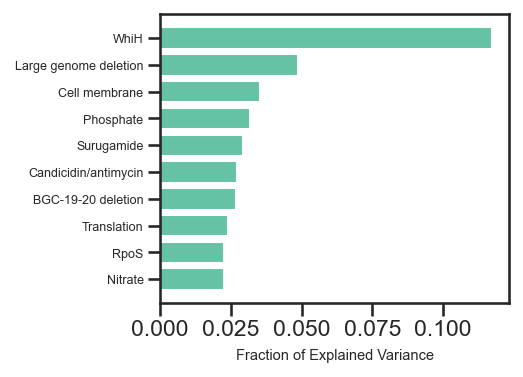

In [40]:
sns.set_theme(style='ticks', palette='Set2')
plt.barh(range(10,0,-1),df_rec_var.head(10),tick_label = df_rec_var.head(10).index)
plt.xlabel('Fraction of Explained Variance',fontsize=7)
# Rename uncharacterized-5 to ppGpp
new_labels = [x if x != 'uncharacterized-5' else 'ppGpp' for x in df_rec_var.head(10).index]
plt.yticks(range(10,0,-1),labels=new_labels,fontsize=6)
plt.savefig(path.join(FIGURE_DIR,'exp_var_top10.svg'))

## Supplementary: venn diagram imodulon functions

In [33]:
# Count the number of occurrences of each function
function_counts = ica_data.imodulon_table['function'].value_counts()
function_counts

Secondary Metabolism                      17
Carbon Metabolism                         12
Unknown                                    9
Stress Response                            6
Fatty Acid Metabolism                      4
Amino Acid Metabolism                      4
Genome Modification                        3
Metal Homeostasis                          3
Membrane Transport                         3
Cell wall/membrane/envelope biogenesis     2
Energy production and Conversion           2
Nitrogen Metabolism                        2
Development                                2
Translation                                2
Quorum sensing                             1
Nucleic Acids                              1
Cell motility                              1
Phosphate Metabolism                       1
DNA Damage                                 1
Sulfate Metabolism                         1
Protease                                   1
Name: function, dtype: int64

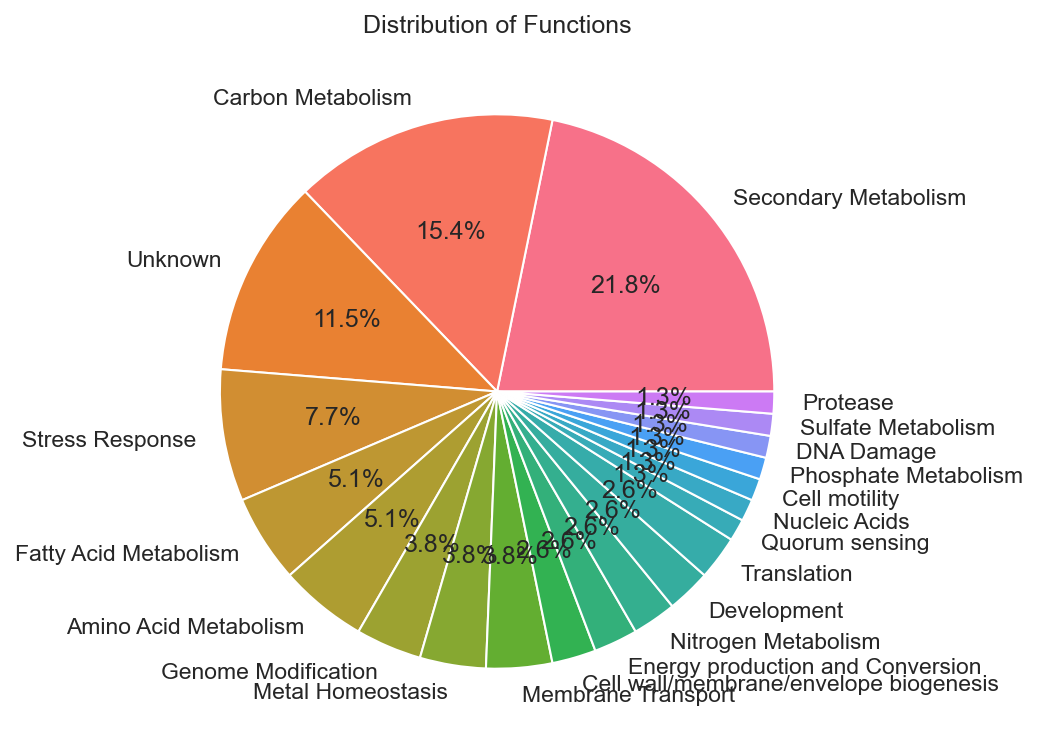

In [51]:
# Generate a 'husl' palette with 16 colors
palette = sns.color_palette('husl', 25)

# Set the current palette to the generated palette
sns.set_palette(palette)

# Count the number of occurrences of each function
function_counts = ica_data.imodulon_table['function'].value_counts()

# Calculate the percentage of each function
function_percentages = function_counts / function_counts.sum() * 100

# Plot the counts as a pie chart with percentages
function_percentages.plot.pie(figsize=(10, 6), autopct='%1.1f%%')

#function_counts.to_csv(path.join(FIGURE_DIR,'function_counts.csv'))

# Remove the 'function' label on the y-axis
plt.ylabel('')

plt.title('Distribution of Functions')
plt.savefig(path.join(FIGURE_DIR,'function_pie.svg'))
plt.show()